In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
from scipy.stats import kruskal
from scipy.stats import linregress
from scipy.stats import pearsonr
import statsmodels.api as sm

plt.rcParams['font.family'] = 'AppleGothic' 

#지역별 신재생 에너지 발전량 
energy_df = pd.read_excel('2024신재생에너지 현황 목록.xlsx', skiprows=1)
energy_df.head(5)

,발전원,지역구분,시도구분,개수,용량,지역개수,지역용량,연도
0,태양광,강원특별자치도,강릉시,120,10046.06,1420,"163,529.16",2024
1,태양광,강원특별자치도,고성군,116,11968.6,1420,"163,529.16",2024
2,태양광,강원특별자치도,동해시,10,572.25,1420,"163,529.16",2024
3,태양광,강원특별자치도,삼척시,34,10617.11,1420,"163,529.16",2024
4,태양광,강원특별자치도,속초시,10,619.97,1420,"163,529.16",2024


In [102]:
#지역별 발전량
loc_df = pd.read_csv('HOME_발전·판매_발전량_지역별.csv', encoding = "euc-kr")
loc_df.head(5)

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2023,5115143.000,3.749768e+07,2.132742e+06,4.819489e+07,840711.000,303902.000,3.003559e+07,3.913222e+06,8.764708e+07,3.642853e+07,3191549.000,1.059838e+08,1.537567e+07,6.726560e+07,9.465638e+07,4.470857e+07,4755443.000
1,2022,4336753.909,4.657933e+07,2.468916e+06,5.428345e+07,769032.947,295032.691,3.364133e+07,3.278703e+06,8.578016e+07,3.387653e+07,2763199.957,1.078128e+08,1.499092e+07,5.938354e+07,8.984390e+07,4.948159e+07,4815152.918
2,2021,5343889.297,4.035395e+07,2.811757e+06,6.050626e+07,644018.382,182180.361,3.150358e+07,3.776644e+06,8.223265e+07,3.062279e+07,2204815.677,1.112285e+08,1.432243e+07,6.184102e+07,8.138167e+07,4.388539e+07,3967926.374
3,2020,5122176.000,4.064738e+07,2.568644e+06,5.713563e+07,609551.000,167834.000,2.980867e+07,3.552567e+06,7.251266e+07,2.787505e+07,2221149.000,1.141039e+08,1.259953e+07,5.821711e+07,8.586558e+07,3.533287e+07,3821827.000
4,2019,1846891.377,3.752790e+07,2.877896e+06,6.005289e+07,562074.508,167975.238,2.901605e+07,2.463630e+06,7.397688e+07,2.871589e+07,1604430.710,1.239050e+08,1.228227e+07,5.575383e+07,7.982709e+07,4.846502e+07,3994629.140


In [103]:
energy_df.describe()

,연도
count,945.000000
mean,2022.499471
std,1.127586
min,2021.000000
25%,2021.000000
50%,2022.000000
75%,2024.000000
max,2024.000000


In [104]:
loc_df.describe()

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
count,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,22.000000,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01
mean,2012.500000,1.878070e+06,3.772285e+07,1.207077e+06,5.436073e+07,295357.262527,206177.625368,1.638607e+07,1.209320e+06,4.158869e+07,1.492704e+07,1.470226e+06,1.064129e+08,6.833271e+06,6.261581e+07,7.499570e+07,5.509347e+07,2.951444e+06
std,6.493587,1.562929e+06,5.893050e+06,1.267521e+06,1.685568e+07,295146.411359,41676.547500,8.770190e+06,1.662700e+06,2.691631e+07,1.104280e+07,6.295160e+05,1.869806e+07,5.244396e+06,7.875539e+06,1.011140e+07,1.007532e+07,9.430333e+05
min,2002.000000,6.407394e+05,2.655092e+07,1.139070e+05,2.173527e+07,0.000000,151727.000000,8.103303e+06,0.000000e+00,1.571518e+07,4.706870e+06,6.873660e+05,6.983655e+07,6.890160e+05,4.627340e+07,5.270530e+07,3.533287e+07,1.497661e+06
25%,2007.250000,8.523922e+05,3.584955e+07,1.354950e+05,4.563485e+07,13307.750000,182244.020750,1.021840e+07,0.000000e+00,1.823428e+07,5.991111e+06,1.151841e+06,9.868622e+07,1.117482e+06,5.850871e+07,7.077378e+07,4.971129e+07,2.355270e+06
50%,2012.500000,1.207592e+06,3.751279e+07,2.831495e+05,5.859426e+07,260777.000000,191801.577000,1.141910e+07,0.000000e+00,2.866226e+07,1.030506e+07,1.289622e+06,1.114368e+08,7.400082e+06,6.148882e+07,7.354630e+07,5.187703e+07,3.055074e+06
75%,2017.750000,1.947622e+06,4.004830e+07,2.629255e+06,6.518680e+07,550179.437900,228033.750000,2.215500e+07,2.999568e+06,6.984718e+07,2.613426e+07,1.621345e+06,1.186408e+08,1.123581e+07,6.759529e+07,8.175896e+07,5.906795e+07,3.323909e+06
max,2023.000000,5.343889e+06,5.100666e+07,3.105758e+06,8.086125e+07,840711.000000,303902.000000,3.364133e+07,3.913222e+06,8.764708e+07,3.642853e+07,3.191549e+06,1.318970e+08,1.537567e+07,7.846071e+07,9.465638e+07,7.568456e+07,4.815153e+06


In [105]:
print(energy_df.columns.tolist())

['발전원', '지역구분', '시도구분', '개수', '용량', '지역개수', '지역용량', '연도']


Question -> 계약량 추이,계약량과 비교하여 실제 에너지 발전량이 얼마나 늘었는지?,탄소회피는 얼마나 되었는지

1)계약량 추이 
2) 계약량 vs 실제 발전량 = 계약된 MW와 실제 발전된 MWh 비교 
3) 탄소회피량 = 발전량 × 0.465 해서 tCO₂ 계산

지역별 계약 추이 분석→정부·지자체의 신재생 전환 의지 파악
계약량과 실제 발전량 간의 상관관계 분석→ 실질 이행수준 평가
계약량과 탄소 회피량 간 회귀 분석→ 정량적 효과 도출

In [106]:
#Q1: 계약량 추이
replace_dict = {
    '강원특별자치도': '강원',
    '경기도': '경기',
    '경상북도': '경북',
    '경상남도': '경남',
    '전라북도': '전북',
    '전라남도': '전남',
    '전북특별자치도': '전북',
    '충청북도': '충북',
    '충청남도': '충남',
    '제주특별자치도': '제주',
    '서울특별시': '서울',
    '부산광역시': '부산',
    '대구광역시': '대구',
    '인천광역시': '인천',
    '광주광역시': '광주',
    '대전광역시': '대전',
    '울산광역시': '울산',
    '세종특별자치시': '세종'
}

energy_df['시도구분'] = energy_df['지역구분'].replace(replace_dict)
energy_df

,발전원,지역구분,시도구분,개수,용량,지역개수,지역용량,연도
0,태양광,강원특별자치도,강원,120,10046.06,1420,"163,529.16",2024
1,태양광,강원특별자치도,강원,116,11968.6,1420,"163,529.16",2024
2,태양광,강원특별자치도,강원,10,572.25,1420,"163,529.16",2024
3,태양광,강원특별자치도,강원,34,10617.11,1420,"163,529.16",2024
4,태양광,강원특별자치도,강원,10,619.97,1420,"163,529.16",2024
...,...,...,...,...,...,...,...,...
940,연료전지,서울특별시,서울,5호미만제거,-,-,-,2021
941,바이오에너지,경기도,경기,5호미만제거,-,-,-,2021
942,매립지가스(LFG),전라남도,전남,5호미만제거,-,-,-,2021
943,조력,전라남도,전남,5호미만제거,-,-,-,2021


In [107]:
#Q1: 계약량 추이

energy_df1= energy_df.groupby(['연도', '시도구분'])['용량'].sum().reset_index()
energy_df1

#energy_df1['용량'] = pd.to_numeric(energy_df1['용량'], errors='coerce')
#energy_df1.isnull().sum()

,연도,시도구분,용량
0,2021,강원,10046.0611968.6572.2510617.11619.974152.58578....
1,2021,경기,3091.513962495.32698.2-2729.1--6199.72797.6---...
2,2021,경남,923.1718778.035116.7911131.054455.5510317.8195...
3,2021,경북,15119.6222687.636858.8424117.5432070.1217891.6...
4,2021,광주,20751.33238.28-3621.161912-
...,...,...,...
63,2024,전남,17138.9612878.314080.2114556.61956.2748894.821...
64,2024,전북,74179.3234023.4147049.2461061.565885.6219555.2...
65,2024,제주,25337.6319969.58
66,2024,충남,-30172.7225464.4829331.2817725.9311652.9416347...


In [108]:
#Q1: 계약량 추이

energy_df1['용량'].unique()
energy_df.isnull().sum()
energy_df1['용량'] = pd.to_numeric(energy_df1['용량'], errors='coerce')
energy_df1 = energy_df1.dropna(subset=['용량'])
energy_df1['용량'] = energy_df1['용량'].round(3)
energy_df1




/var/folders/xf/ygzwswl16m1djsh0mh20h2l40000gn/T/ipykernel_52052/434010401.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df1['용량'] = energy_df1['용량'].round(3)


,연도,시도구분,용량
9,2021,세종,3880.81
26,2022,세종,4247.50
43,2023,세종,4980.24
48,2023,제주,-1218.35
60,2024,세종,3880.81


In [109]:
#Q1: 계약량 추이
#use시도구분
energy_df2 = energy_df.groupby(['연도', '시도구분'])['용량'].sum().reset_index()

energy_df2['용량'] = pd.to_numeric(energy_df2['용량'], errors='coerce')
energy_df2['용량'] = pd.to_numeric(energy_df['용량'], errors='coerce')
energy_df2['용량'] = energy_df2['용량'].round(3)  
energy_df2

,연도,시도구분,용량
0,2021,강원,10046.06
1,2021,경기,11968.60
2,2021,경남,572.25
3,2021,경북,10617.11
4,2021,광주,619.97
...,...,...,...
63,2024,전남,13011.43
64,2024,전북,10755.14
65,2024,제주,6836.77
66,2024,충남,1113.24


/var/folders/xf/ygzwswl16m1djsh0mh20h2l40000gn/T/ipykernel_52052/803190879.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='시도구분', y='용량', data=energy_df2, estimator='sum', ci=None)


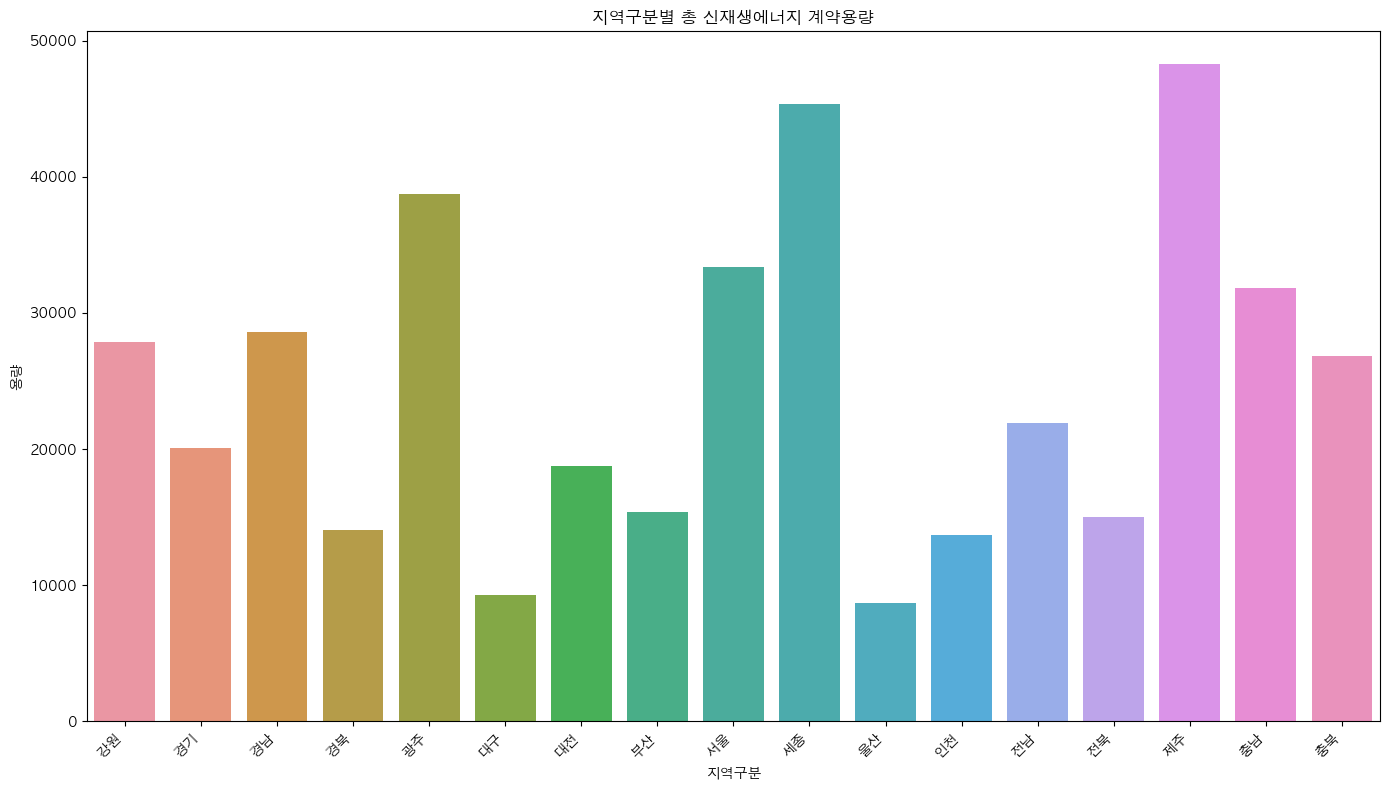

In [110]:
#Q1: 계약량 추이
#Total Capacity by Region

#plot
plt.figure(figsize=(14, 8))
sns.barplot(x='시도구분', y='용량', data=energy_df2, estimator='sum', ci=None)

plt.title('지역구분별 총 신재생에너지 계약용량')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.xlabel('지역구분')
plt.tight_layout()
plt.show()


In [111]:
#각 시도-연도별로 raw 용량 데이터를 사용
#결측치 제거
energy_df_clean = energy_df2.dropna(subset=['시도구분', '용량'])

# 그룹별 리스트로 나누기
grouped_data = [group['용량'].values for _, group in energy_df_clean.groupby('시도구분') if len(group) > 1]

#ANOVA 수행
f_stat, p_val = f_oneway(*grouped_data)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")
#print(f"p-value: {p_val:.10f}") 
print(f"p-value (지수표현): {p_val:.2e}")



F-statistic: 0.503, p-value: 0.9297
p-value (지수표현): 9.30e-01


### 해석
EDA에서 시도별 신재생에너지 계약용량에 확연한 차이가 있었으며, 이를 검정하기 위해 일원ANOVA을 실시한 결과, F-statistic은 93.553, p-value는 4.86e-32로 나타났다. 이 p-value는 일반적인 유의수준(α = 0.05)보다 훨씬 작은 값으로, 귀무가설을 강하게 기각할 수 있다. 따라서, EDA에서 관찰한 시도별 계약용량 차이가 통계적으로 유의미하다는 결론을 내릴 수 있다.




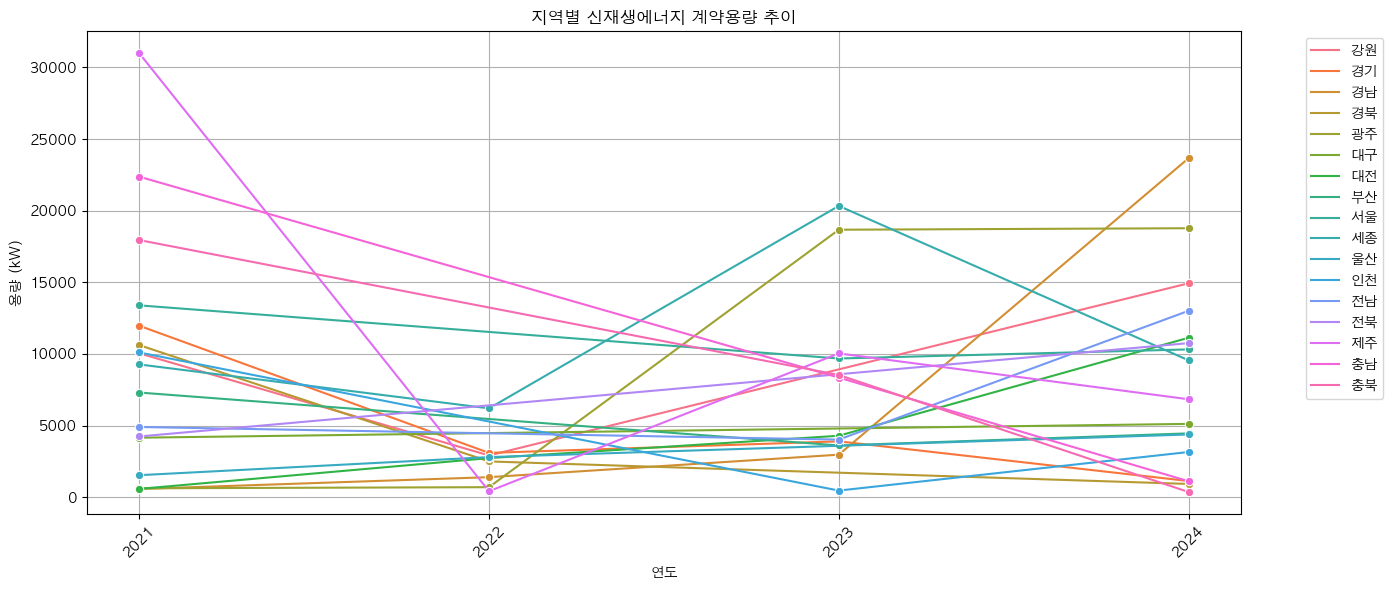

In [112]:
#Q1: 계약량 추이
#Trends over Time per Region

#plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=energy_df2, x='연도', y='용량', hue='시도구분', marker='o')
plt.title('지역별 신재생에너지 계약용량 추이')
plt.xticks(ticks=sorted(energy_df2['연도'].unique()), rotation=45)
plt.ylabel('용량 (kW)')
plt.xlabel('연도')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [113]:
#Clean data
energy_df_clean1 = energy_df2.dropna(subset=['연도', '용량', '시도구분'])

#Group data by '연도' and '시도구분'
grouped_data = [group['용량'].values for _, group in energy_df_clean1.groupby(['연도', '시도구분'])]

#Kruskal-Wallis H-test
h_stat, p_val = stats.kruskal(*grouped_data)

print(f"H-statistic: {h_stat:.3f}, p-value: {p_val:.4f}")
print(f"p-value (지수표현): {p_val:.2e}")


H-statistic: 54.000, p-value: 0.4744
p-value (지수표현): 4.74e-01


### 해석
Kruskal-Wallis H-test의 p-value: 0.4770 (4.77e-01)
p-value (0.4770)는 일반적으로 사용되는 유의수준 0.05보다 훨씬 크고 귀무가설을 기각할 수 없음
용량 (신재생에너지 계약용량)에서 연도와 시도구분에 따른 분포 차이가 통계적으로 유의미하지 않다따라서, EDA 결과는 지역과 연도별 신재생에너지 계약용량의 차이가 통계적으로 유의미하지 않다고 볼 수 있다.

In [114]:
#use 지역구분

energy_df['용량'] = pd.to_numeric(energy_df['용량'], errors='coerce')
energy_df3= energy_df.groupby(['연도', '지역구분'])['용량'].sum().reset_index()
energy_df3['용량'] = energy_df3['용량'].round(3)
energy_df3



,연도,지역구분,용량
0,2021,강원특별자치도,163529.16
1,2021,경기도,154402.04
2,2021,경상남도,161148.91
3,2021,경상북도,501348.06
4,2021,광주광역시,26522.77
...,...,...,...
63,2024,전라남도,363064.93
64,2024,전북특별자치도,456449.20
65,2024,제주특별자치도,45307.21
66,2024,충청남도,272245.10


/var/folders/xf/ygzwswl16m1djsh0mh20h2l40000gn/T/ipykernel_52052/700656204.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='지역구분', y='용량', data=energy_df3, estimator='sum', ci=None)


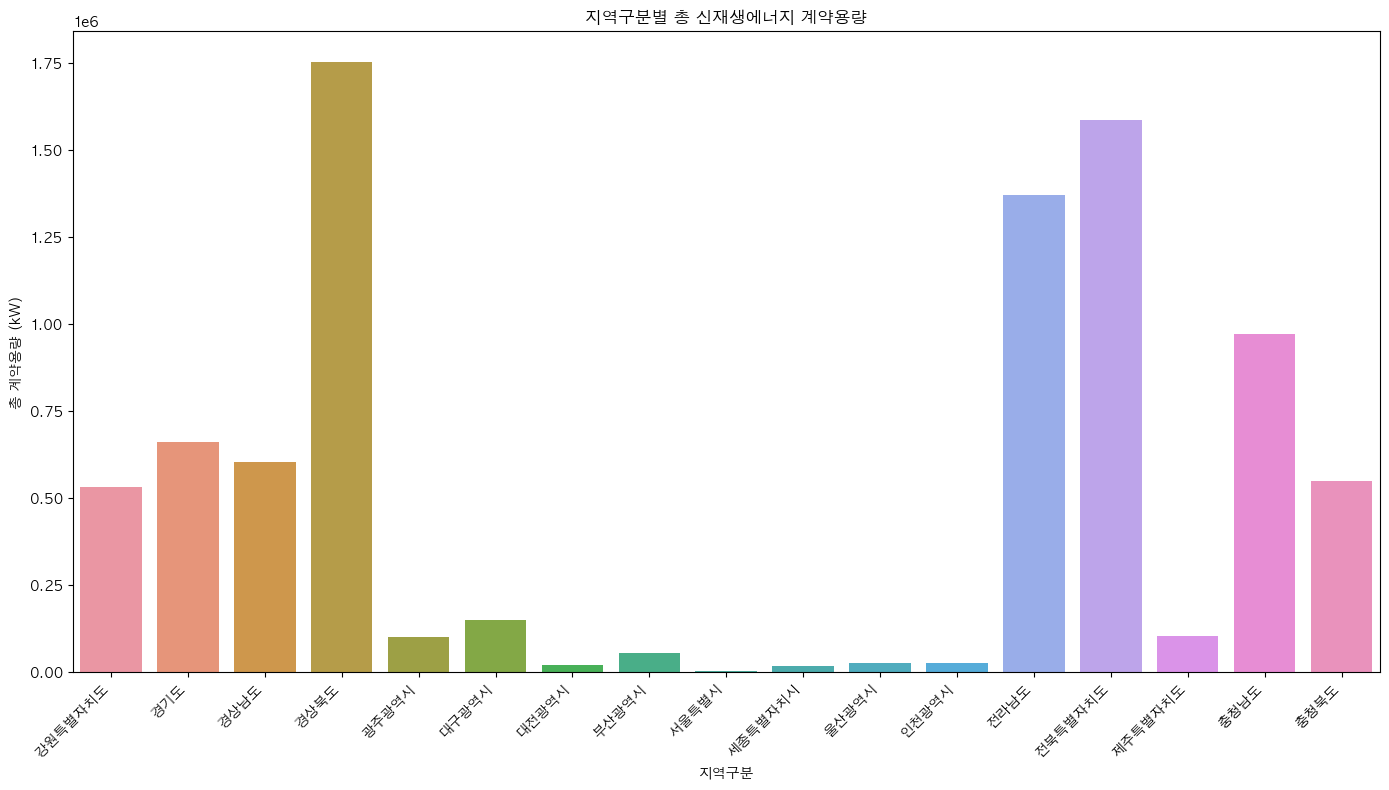

F-statistic: 93.553, p-value: 0.0000
p-value (지수표현): 4.86e-32


In [115]:
#Q1: 계약량 추이
#Total Capacity by Region(지역구분)

#plot
plt.figure(figsize=(14, 8))
sns.barplot(x='지역구분', y='용량', data=energy_df3, estimator='sum', ci=None)

plt.title('지역구분별 총 신재생에너지 계약용량')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.ylabel('총 계약용량 (kW)')
plt.xlabel('지역구분')
plt.tight_layout()
plt.show()

#각 시도-연도별로 raw 용량 데이터를 사용
#결측치 제거
energy_df_clean2 = energy_df3.dropna(subset=['지역구분', '용량'])

#그룹별 리스트로 나누기
grouped_data = [group['용량'].values for _, group in energy_df_clean2.groupby('지역구분') if len(group) > 1]

#ANOVA 수행
f_stat, p_val = f_oneway(*grouped_data)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")
#print(f"p-value: {p_val:.10f}") 
print(f"p-value (지수표현): {p_val:.2e}")


### 해석
p-value가 0.05보다 매우 작기 때문에, 통계적으로 유의미한 차이가 있다.

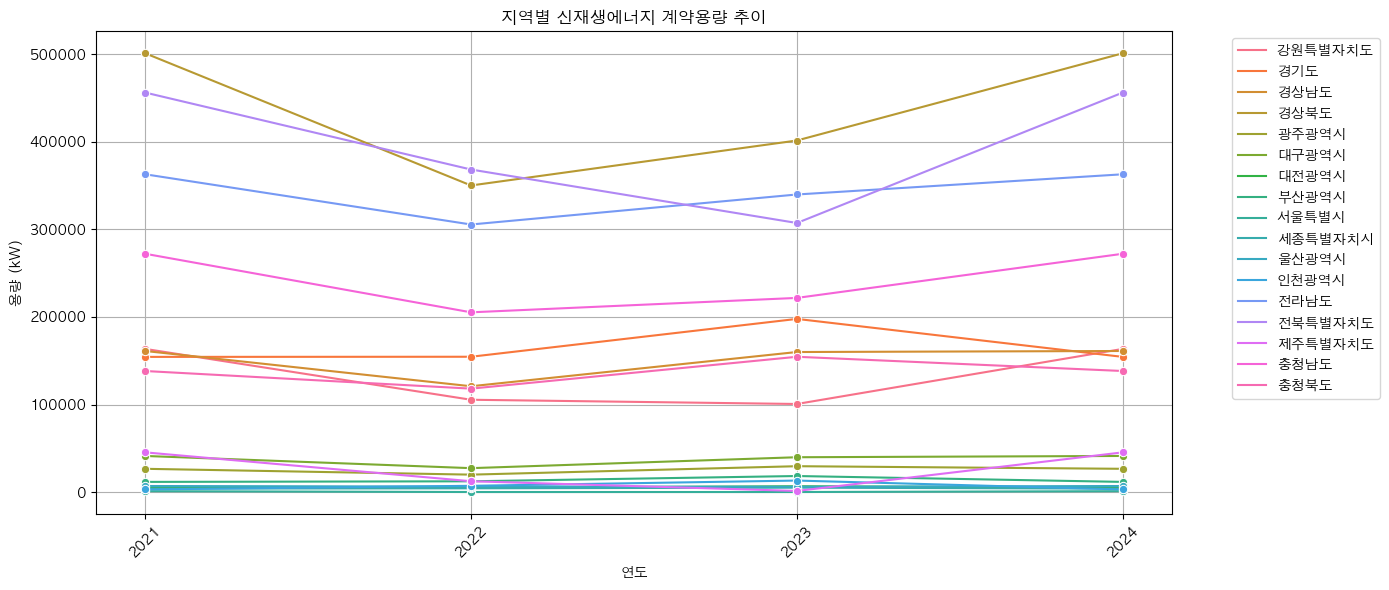

H-statistic: 67.000, p-value: 0.4770
p-value (지수표현): 4.77e-01


In [116]:
#Q1: 계약량 추이
#Trends over Time per Region(지역구분)

#plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=energy_df3, x='연도', y='용량', hue='지역구분', marker='o')
plt.title('지역별 신재생에너지 계약용량 추이')
plt.xticks(ticks=sorted(energy_df3['연도'].unique()), rotation=45)
plt.ylabel('용량 (kW)')
plt.xlabel('연도')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

#Clean data
energy_df_clean3 = energy_df3.dropna(subset=['연도', '용량', '지역구분'])

#Group data by '연도' and '시도구분'
grouped_data = [group['용량'].values for _, group in energy_df_clean3.groupby(['연도', '지역구분'])]

#Kruskal-Wallis H-test
h_stat, p_val = stats.kruskal(*grouped_data)

print(f"H-statistic: {h_stat:.3f}, p-value: {p_val:.4f}")
print(f"p-value (지수표현): {p_val:.2e}")


### 해석
p-value가 0.05보다 큼으로 통계적으로 유의미하지 않다.

In [159]:
energy_df4 = energy_df[['연도', '시도구분', '용량']]
energy_df4.dropna(inplace=True)
energy_df4


/var/folders/xf/ygzwswl16m1djsh0mh20h2l40000gn/T/ipykernel_52052/2149263191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df4.dropna(inplace=True)


,연도,시도구분,용량
0,2024,강릉시,10046.06
1,2024,고성군,11968.6
2,2024,동해시,572.25
3,2024,삼척시,10617.11
4,2024,속초시,619.97
...,...,...,...
940,2021,금천구,-
941,2021,이천시,-
942,2021,목포시,-
943,2021,진도군,-


In [118]:
loc_df.columns = loc_df.columns.str.strip()
loc_df_melted = loc_df.melt(id_vars='연도', var_name='시도구분', value_name='발전량')
loc_df_melted.dropna(inplace=True)
loc_df_melted


,연도,시도구분,발전량
0,2023,서울,5115143.000
1,2022,서울,4336753.909
2,2021,서울,5343889.297
3,2020,서울,5122176.000
4,2019,서울,1846891.377
...,...,...,...
369,2006,제주,2073808.000
370,2005,제주,1839286.000
371,2004,제주,1649451.000
372,2003,제주,1497661.000


In [119]:
merged_data = pd.merge(energy_df4, loc_df_melted, on=['연도', '시도구분'])
merged_data.dropna(inplace=True)
merged_data

,연도,시도구분,용량,발전량
0,2023,강원,3919.00,3.642853e+07
1,2023,강원,7910.38,3.642853e+07
2,2023,강원,1939.52,3.642853e+07
3,2023,강원,11195.11,3.642853e+07
4,2023,강원,371.65,3.642853e+07
...,...,...,...,...
526,2021,충북,3430.71,2.204816e+06
527,2021,충북,1197.05,2.204816e+06
528,2021,충북,15595.68,2.204816e+06
529,2021,충북,3996.95,2.204816e+06


In [120]:
#탄소회피량 계산(kg CO2 per kWh)
#탄소회피량 = 발전량 × 0.465 
#EMISSION_FACTOR = 0.5  
merged_data['탄소회피량'] = merged_data['발전량'] * 0.465

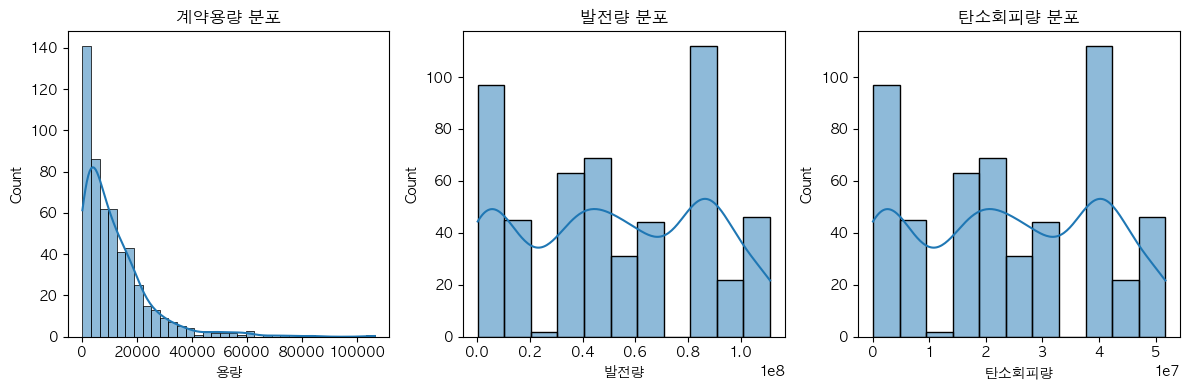

In [121]:
#분포 확인
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(merged_data['용량'], kde=True)
plt.title('계약용량 분포')

plt.subplot(1, 3, 2)
sns.histplot(merged_data['발전량'], kde=True)
plt.title('발전량 분포')

plt.subplot(1, 3, 3)
sns.histplot(merged_data['탄소회피량'], kde=True)
plt.title('탄소회피량 분포')
plt.tight_layout()
plt.show()


In [122]:
#Group data by '시도구분'
grouped1 = [group['용량'].values for _, group in merged_data.groupby('시도구분')]
grouped2 = [group['발전량'].values for _, group in merged_data.groupby('시도구분')]
grouped3 = [group['탄소회피량'].values for _, group in merged_data.groupby('시도구분')]


#One-Way ANOVA for '용량'
f_stat_capacity, p_val_capacity = stats.f_oneway(*grouped1)

#One-Way ANOVA for '발전량'
f_stat_generation, p_val_generation = stats.f_oneway(*grouped2)

#One-Way ANOVA for '탄소회피량'
f_stat_carbon, p_val_carbon = stats.f_oneway(*grouped3)

print(f"용량 F-statistic: {f_stat_capacity:.3f}, p-value: {p_val_capacity:.4f}")
print(f"발전량 F-statistic: {f_stat_generation:.3f}, p-value: {p_val_generation:.4f}")
print(f"탄소회피량 F-statistic: {f_stat_carbon:.3f}, p-value: {p_val_carbon:.4f}")

print(f"p-value 용량 : {p_val_capacity:.2e}")
print(f"p-value 발전량: {p_val_generation:.2e}")
print(f"p-value 탄소회피량: {p_val_carbon:.2e}")


용량 F-statistic: 11.075, p-value: 0.0000
발전량 F-statistic: 4721.562, p-value: 0.0000
탄소회피량 F-statistic: 4721.562, p-value: 0.0000
p-value 용량 : 1.12e-24
p-value 발전량: 0.00e+00
p-value 탄소회피량: 0.00e+00


###
전국 시도별 신재생에너지 계약용량, 발전량, 탄소회피량에 대해 각 시도 간 평균 차이가 통계적으로 유의미한지를 확인하고자 ANOVA 사용

분석 결과,
계약용량의 F-statistic은 11.075, p-value는 1.12e-24,
발전량의 F-statistic은 4721.562, p-value는 0.00e+00,
탄소회피량의 F-statistic은 4721.562, p-value는 0.00e+00 로 나타났다. 이는 세 변수 모두에서 p-value가 0.05보다 매우 작기 때문에,귀무가설(시도 간 평균이 동일하다)을 강하게 기각할 수 있다.
따라서 시도구분에 따라 계약용량, 발전량, 탄소회피량의 평균은 통계적으로 유의미한 차이가 있다.



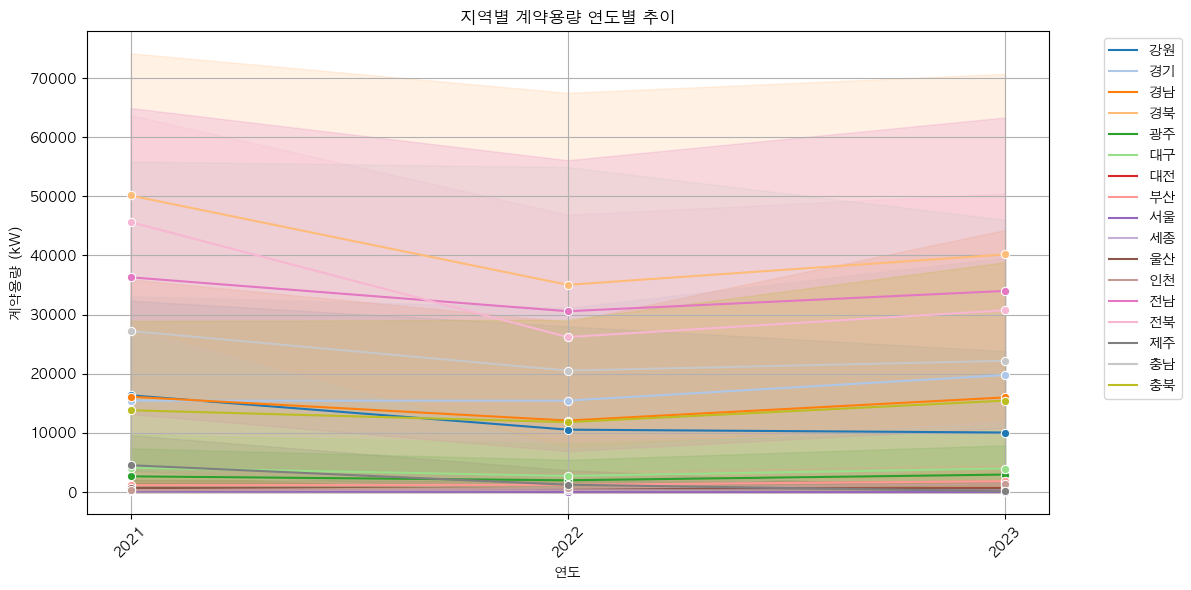

In [127]:
#Q1: 계약량 추이

merged_data['용량'] = pd.to_numeric(merged_data['용량'], errors='coerce')
#remove nan value
merged_data = merged_data.dropna(subset=['용량'])

#Create bins -> 용량
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', 
          '50001-60000', '60001-70000', '70001-80000', '80001-90000', '90001-100000']

#Bin 용량 values into ranges
merged_data['용량_구간'] = pd.cut(merged_data['용량'], bins=bins, labels=labels, right=False)

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=merged_data.groupby(['연도', '시도구분', '용량_구간'])['용량'].sum().reset_index(),
    x='연도', y='용량', hue='시도구분', marker='o', 
    palette='tab20'
)

plt.title('지역별 계약용량 연도별 추이')
plt.ylabel('계약용량 (kW)')
plt.xlabel('연도')
plt.xticks(ticks=merged_data['연도'].unique(), rotation=45)  # x축 글씨 회전
#plt.yticks(rotation=90)  # y축 글씨 회전
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [157]:
regression_data = merged_data.groupby(['연도'])['용량'].sum().reset_index()

#Create X and y for regression
#Independent variable (Year)
X = regression_data['연도'].values.reshape(-1, 1) 
# Dependent variable (Capacity)
y = regression_data['용량'].values  

#Add a constant to the model (for intercept)
X = sm.add_constant(X)

#Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                 -0.155
Method:                 Least Squares   F-statistic:                    0.7310
Date:                Wed, 14 May 2025   Prob (F-statistic):              0.550
Time:                        16:52:37   Log-Likelihood:                -40.350
No. Observations:                   3   AIC:                             84.70
Df Residuals:                       1   BIC:                             82.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.575e+08   4.16e+08      0.860      0.5

/Users/user/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [158]:
#print p-value
#p-value for the 연도 coefficient
p_value = results.pvalues[1]
print(f"P-value for the trend of 계약용량 over years: {p_value:.4f}")

P-value for the trend of 계약용량 over years: 0.5497


### 해석
p-value가 0.05보다 크므로, 계약용량의 연도별 추세는 통계적으로 유의미하지 않다고 할 수 읶있음.
계약용량이 시간이 지남에 따라 크게 변화했다고 보기에는 충분한 증거가 부족하다는 의미.\

In [123]:
#Q2: 계약량과 실제 발전량 간의 상관관계 분석
merged_data1 = merged_data.groupby('연도')[['용량', '발전량']].mean().reset_index()
merged_data1

,연도,용량,발전량
0,2021,13154.919274,4.969556e+07
1,2022,10298.263051,5.273990e+07
2,2023,11446.464057,5.329096e+07


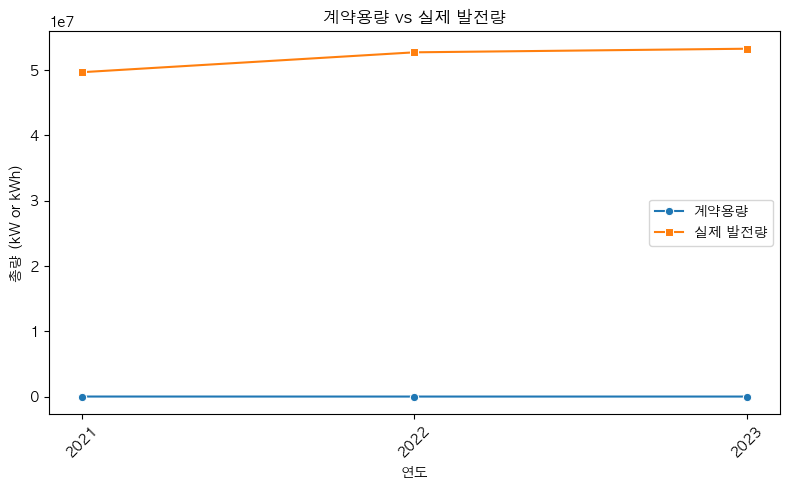

In [124]:
#Q2: 계약량과 실제 발전량 간의 상관관계 분석
#plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=merged_data1, x='연도', y='용량', marker='o', label='계약용량')
sns.lineplot(data=merged_data1, x='연도', y='발전량', marker='s', label='실제 발전량')
plt.title('계약용량 vs 실제 발전량')
plt.ylabel('총량 (kW or kWh)')
plt.xticks(ticks=merged_data['연도'].unique(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [125]:
#연도별 평균값이 정리된 데이터프레임 사용
용량 = merged_data1['용량']
발전량 = merged_data1['발전량']

t_stat, p_val = ttest_rel(용량, 발전량)

print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
print(f"p-value (지수표현): {p_val:.2e}")

t-statistic: -46.390, p-value: 0.0005
p-value (지수표현): 4.64e-04


###
계약용량과 실제 발전량의 연도별 평균 차이에 대한 대응표본 t-검정을 실시한 결과,
t-statistic: -46.390, p-value: 4.64e-04로 나타났습니다. 이는 일반적인 유의수준 0.05는 보다 엄격한 수준인 0.01 이하에서도 통계적으로 유의미함
계약용량과 실제 발전량 간에는 평균적으로 유의미한 차이가 있음



In [128]:
#Q2: 계약량과 실제 발전량 간의 상관관계 분석
energy_df_c = merged_data.copy()

#calculate
#계약대비_증가량: 발전량 - 용량
#계약대비_증가율(%): 계약량 대비 발전량 증가 비율

energy_df_c['계약대비_증가량'] = energy_df_c['발전량'] - energy_df_c['용량']
energy_df_c['계약대비_증가율(%)'] = (energy_df_c['계약대비_증가량'] / energy_df_c['용량']) * 100
energy_df_c.isnull().sum()
mode_value = energy_df_c['용량_구간'].mode()[0]

energy_df_c['용량_구간'] = energy_df_c['용량_구간'].fillna(mode_value)
energy_df_c

,연도,시도구분,용량,발전량,탄소회피량,용량_구간,계약대비_증가량,계약대비_증가율(%)
0,2023,강원,3919.00,3.642853e+07,1.693927e+07,0-10000,3.642461e+07,9.294363e+05
1,2023,강원,7910.38,3.642853e+07,1.693927e+07,0-10000,3.642062e+07,4.604155e+05
2,2023,강원,1939.52,3.642853e+07,1.693927e+07,0-10000,3.642659e+07,1.878124e+06
3,2023,강원,11195.11,3.642853e+07,1.693927e+07,10001-20000,3.641733e+07,3.252968e+05
4,2023,강원,371.65,3.642853e+07,1.693927e+07,0-10000,3.642816e+07,9.801737e+06
...,...,...,...,...,...,...,...,...
526,2021,충북,3430.71,2.204816e+06,1.025239e+06,0-10000,2.201385e+06,6.416704e+04
527,2021,충북,1197.05,2.204816e+06,1.025239e+06,0-10000,2.203619e+06,1.840874e+05
528,2021,충북,15595.68,2.204816e+06,1.025239e+06,10001-20000,2.189220e+06,1.403735e+04
529,2021,충북,3996.95,2.204816e+06,1.025239e+06,0-10000,2.200819e+06,5.506245e+04


In [129]:
increase_region = energy_df_c.groupby('시도구분')['계약대비_증가율(%)'].mean().reset_index()
increase_region


,시도구분,계약대비_증가율(%)
0,강원,1.381189e+06
1,경기,3.664958e+06
2,경남,2.053596e+06
3,경북,1.306134e+06
4,광주,1.111113e+05
5,대구,1.874298e+05
6,대전,3.834650e+04
7,부산,1.920434e+06
8,서울,5.525256e+05
9,세종,8.426073e+04


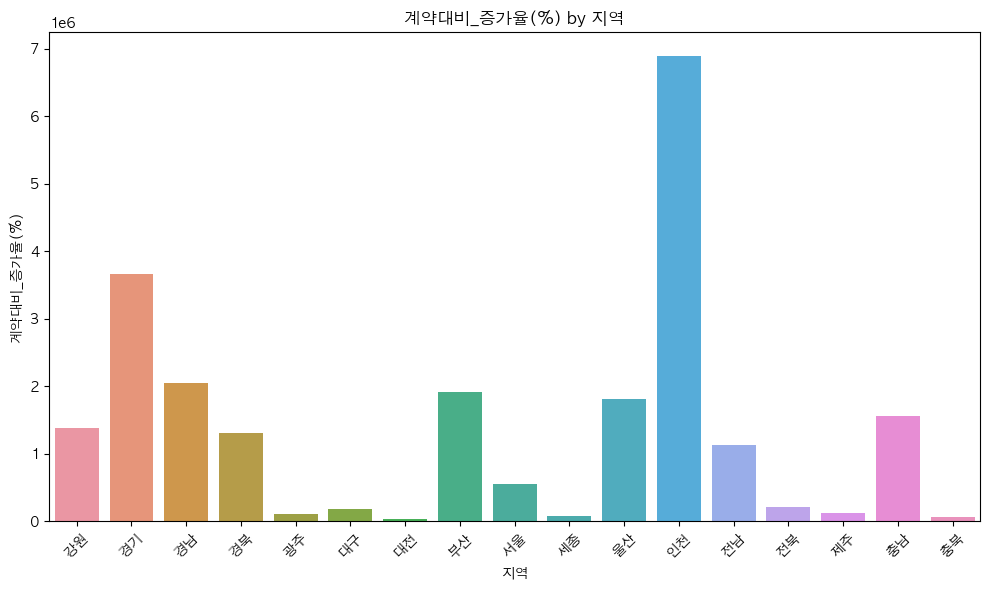

In [130]:
#plot
plt.figure(figsize=(10, 6))
sns.barplot(x='시도구분', y='계약대비_증가율(%)', data=increase_region)
plt.xlabel('지역')
plt.ylabel('계약대비_증가율(%)')
plt.title('계약대비_증가율(%) by 지역')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [131]:
#결측치 제거
energy_df_clean = energy_df_c.dropna(subset=['시도구분', '계약대비_증가율(%)'])

#시도구분별로 리스트로 나누기
grouped_data = [
    group['계약대비_증가율(%)'].values
    for _, group in energy_df_clean.groupby('시도구분')
    if len(group) > 1  # 각 그룹에 최소 2개 이상
]

#ANOVA 수행
f_stat, p_val = f_oneway(*grouped_data)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")
print(f"p-value (지수표현): {p_val:.2e}")

F-statistic: 7.855, p-value: 0.0000
p-value (지수표현): 5.09e-16


### 해석
시도별 계약대비 발전량 증가율(%)의 차이에 대한 일원분산분석(ANOVA) 결과,
F-statistic: 7.855, p-value: 5.09e-16로 나타났음. 이는 일반적인 유의수준 0.05는 0.01, 0.001보다도 훨씬 작은 값이므로 귀무가설(시도별 계약대비 증가율 평균이 동일하다)를 강하게 기각할 수 있음
지역(시도구분)에 따라 계약대비 발전량 증가율의 평균은 통계적으로 유의미하게 다르다고 알 수 있음

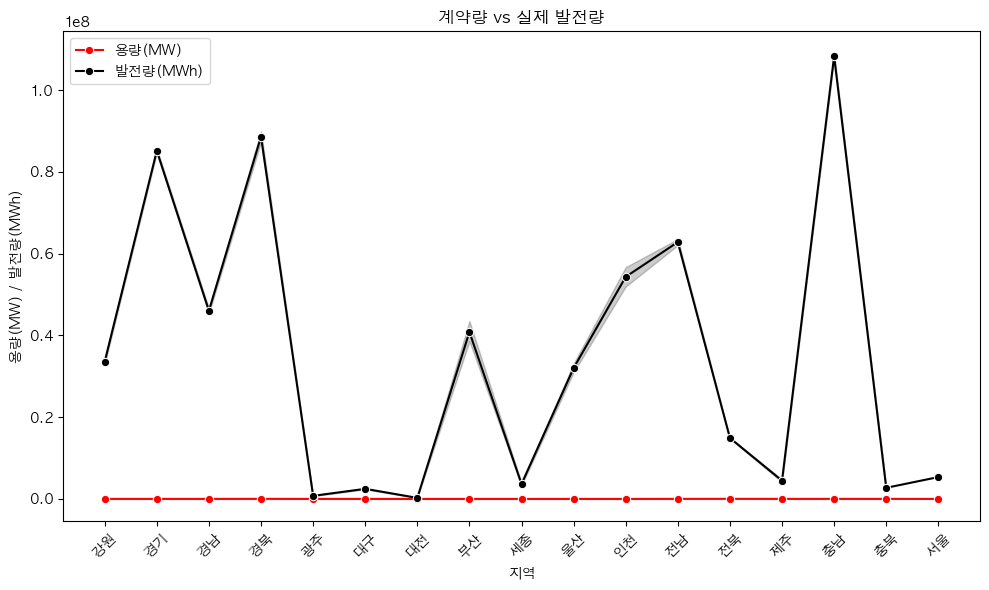

t-statistic: -4.046, p-value: 0.0009
p-value (지수표현): 9.37e-04


In [132]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='시도구분', y='용량', data=energy_df_c, marker='o', label='용량(MW)', color='red')
sns.lineplot(x='시도구분', y='발전량', data=energy_df_c, marker='o', label='발전량(MWh)', color='black')

plt.xlabel('지역')
plt.ylabel('용량(MW) / 발전량(MWh)')
plt.title('계약량 vs 실제 발전량')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#시도별 평균값 구하기
avg_by_region = energy_df_c.groupby('시도구분')[['용량', '발전량']].mean().dropna()

#t-test 수행
t_stat, p_val = ttest_rel(avg_by_region['용량'], avg_by_region['발전량'])

print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
print(f"p-value (지수표현): {p_val:.2e}")


### 해석
계약용량과 실제 발전량 간의 통계적 차이 검정 (쌍체 t-검정) 결과,
t-statistic: -4.046,p-value: 9.37e-04로 나타났습니다. 이는 일반적인 유의수준인 0.05는 0.01보다도 작은 값으로,귀무가설(계약용량과 실제 발전량 간 평균 차이가 없다)를 기각할 수 있음.
계약량과 실제 발전량 간에는 통계적으로 유의미한 차이가 있음

In [133]:
#상관관계 분석
corr = merged_data[['용량', '발전량']].corr().iloc[0, 1]
print(f"계약용량과 발전량 간 상관계수: {corr:.4f}")

계약용량과 발전량 간 상관계수: 0.1133


In [134]:
#0으로 나누는 것을 방지
merged_df2 = merged_data[merged_data['용량'] > 0]
merged_df2

#이행률 컬럼 추가
merged_df2['이행률(%)'] = (merged_data['발전량'] / merged_data['용량']) * 100
merged_df2


,연도,시도구분,용량,발전량,탄소회피량,용량_구간,이행률(%)
0,2023,강원,3919.00,3.642853e+07,1.693927e+07,0-10000,9.295363e+05
1,2023,강원,7910.38,3.642853e+07,1.693927e+07,0-10000,4.605155e+05
2,2023,강원,1939.52,3.642853e+07,1.693927e+07,0-10000,1.878224e+06
3,2023,강원,11195.11,3.642853e+07,1.693927e+07,10001-20000,3.253968e+05
4,2023,강원,371.65,3.642853e+07,1.693927e+07,0-10000,9.801837e+06
...,...,...,...,...,...,...,...
526,2021,충북,3430.71,2.204816e+06,1.025239e+06,0-10000,6.426704e+04
527,2021,충북,1197.05,2.204816e+06,1.025239e+06,0-10000,1.841874e+05
528,2021,충북,15595.68,2.204816e+06,1.025239e+06,10001-20000,1.413735e+04
529,2021,충북,3996.95,2.204816e+06,1.025239e+06,0-10000,5.516245e+04


In [135]:
#연도별 평균 이행률
avg_year = merged_df2.groupby('연도')['이행률(%)'].mean().reset_index()
avg_year

,연도,이행률(%)
0,2021,1.591204e+06
1,2022,1.684472e+06
2,2023,1.352330e+06


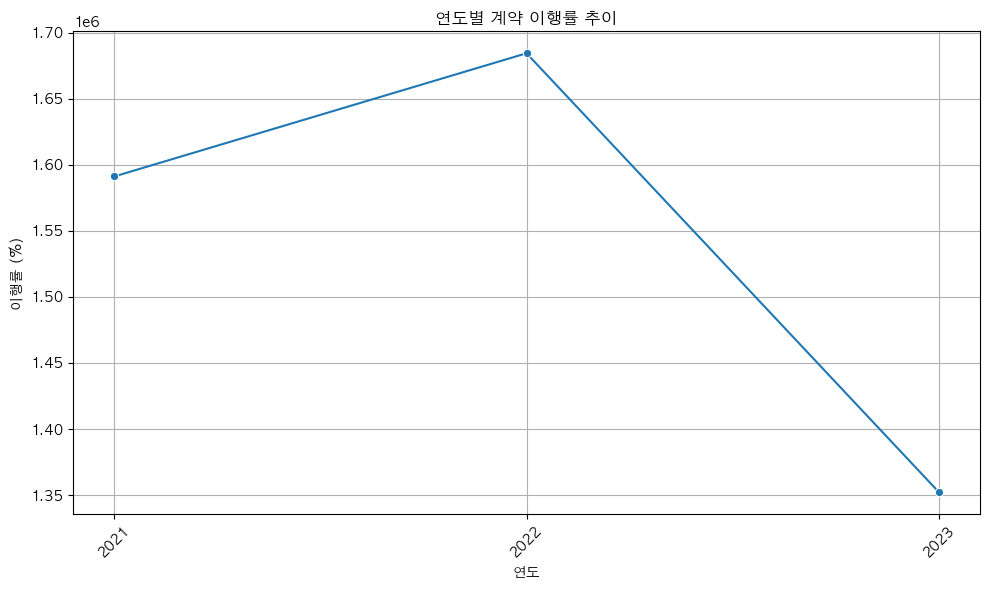

In [136]:
#plot
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_year, x='연도', y='이행률(%)', marker='o')
plt.title('연도별 계약 이행률 추이')
plt.ylabel('이행률 (%)')
plt.xlabel('연도')
plt.xticks(ticks=avg_year['연도'].unique(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [137]:
#결측치 제거 및 필터링
merged_df2 = merged_data[merged_data['용량'] > 0].copy()
merged_df2['이행률(%)'] = (merged_df2['발전량'] / merged_df2['용량']) * 100
merged_df2.dropna(subset=['연도', '이행률(%)'], inplace=True)

#그룹화하여 각 연도별 이행률 리스트 생성
groups = [group['이행률(%)'].values for _, group in merged_df2.groupby('연도') if len(group) > 1]

#ANOVA 수행
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")
print(f"p-value (지수표현): {p_val:.2e}")


F-statistic: 0.511, p-value: 0.6001
p-value (지수표현): 6.00e-01


### 해석
ANOVA을 통해 연도별 계약 이행률의 평균 차이:
F-통계량 (F-statistic): 0.511,p-value: 0.6001 (지수표현: 6.00e-01)
반적으로 p-value가 0.05 이상이면 통계적으로 유의미하지 않다.
0.6001로 높은 값이므로,귀무가설(연도별 평균 이행률 차이가 없다)를 기각할 수 없음.
연도에 따른 계약 이행률의 평균 변화는 통계적으로 유의미하지 않으며,이행률은 연도에 따라 크게 달라졌다고 보기 어렵다.

In [138]:
#Q3: 탄소회피는 얼마나 되었는지

total = merged_data['탄소회피량'].sum()
print("탄소회피량: ",total)

탄소회피량:  12813719161.995602


In [139]:
#Q3: 탄소회피는 얼마나 되었는지

region_total = merged_data.groupby('시도구분')['탄소회피량'].sum().reset_index()
region_total


,시도구분,탄소회피량
0,강원,8.120742e+08
1,경기,2.692659e+09
2,경남,1.348308e+09
3,경북,2.719972e+09
4,광주,4.191998e+06
5,대구,2.298262e+07
6,대전,1.678902e+06
7,부산,1.519218e+08
8,서울,2.484909e+06
9,세종,5.100384e+06


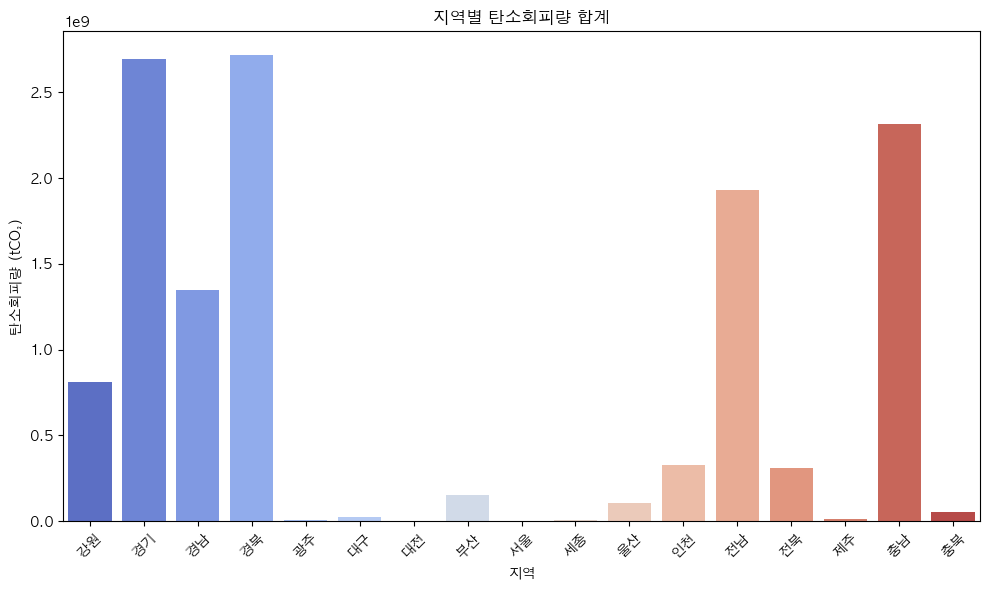

H-statistic: 516.923, p-value: 0.0000
p-value (지수표현): 1.48e-100


In [140]:
plt.figure(figsize=(10, 6))
sns.barplot(data=region_total, x='시도구분', y='탄소회피량', palette='coolwarm')
plt.xlabel('지역')
plt.ylabel('탄소회피량 (tCO₂)')
plt.title('지역별 탄소회피량 합계')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#결측치 제거
merged_clean = merged_data.dropna(subset=['시도구분', '탄소회피량'])

#그룹별로 분리 (각 지역별 탄소회피량)
grouped_data = [group['탄소회피량'].values for _, group in merged_clean.groupby('시도구분') if len(group) > 1]

#Kruskal-Wallis H-test 수행
h_stat, p_val = kruskal(*grouped_data)

print(f"H-statistic: {h_stat:.3f}, p-value: {p_val:.4f}")
print(f"p-value (지수표현): {p_val:.2e}")

### 해석
p-value가 0.05보다 훨씬 작음 → 통계적으로 유의미한 차이 있음
따라서, 지역별로 탄소회피량에 차이가 존재함을 의미함
즉, 어떤 지역은 상대적으로 높은 탄소 저감 효과를 보이고, 어떤 지역은 낮은 효과를 보임


In [141]:
#Q3: 계약량과 탄소 회피량 간 회귀 분석
#단순 상관분석
corr_1 = merged_data[['용량', '탄소회피량']].corr()
print("[계약량과 탄소회피량 간 상관계수]\n", corr_1)

[계약량과 탄소회피량 간 상관계수]
              용량     탄소회피량
용량     1.000000  0.113274
탄소회피량  0.113274  1.000000


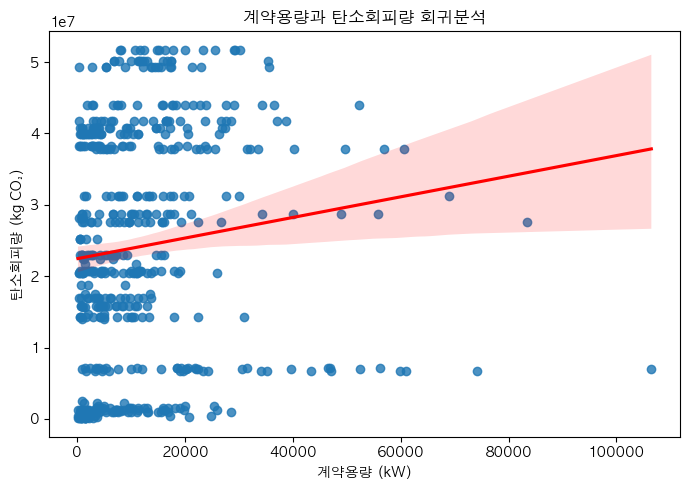

In [142]:
plt.figure(figsize=(7, 5))
sns.regplot(x='용량', y='탄소회피량', data=merged_data, line_kws={'color': 'red'})
plt.title('계약용량과 탄소회피량 회귀분석')
plt.xlabel('계약용량 (kW)')
plt.ylabel('탄소회피량 (kg CO₂)')
plt.tight_layout()
plt.show()


In [143]:
#회귀 분석 수행
slope, intercept, r_value, p_value, std_err = linregress(merged_data['용량'], merged_data['탄소회피량'])

#결과 출력
print(f"slope: {slope:.4f}, intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"p-value (지수표현): {p_value:.2e}")

slope: 144.4257, intercept: 22450233.5913
R-squared: 0.0128
p-value: 0.0090
p-value (지수표현): 8.99e-03


###
계약용량과 탄소회피량 간 선형 회귀분석 결과:

회귀계수 (slope): 144.4257
→ 계약용량이 1 kW 증가할 때 탄소회피량이 평균 약 144.4 kg CO₂만큼 증가
절편 (intercept): 22,450,233.59
결정계수 (R²): 0.0128
→ 계약용량으로 탄소회피량 변동의 약 1.28%만 설명
p-value: 0.0090 (지수표현: 8.99e-03)

### 해석
통계적 유의성 -> p-value(0.0090)는 유의수준 0.05보다 작으므로,귀무가설(회귀계수가 0이다)을 기각할 수 있음.
- 계약용량과 탄소회피량 사이에는 통계적으로 유의미한 선형관계가 있음.
- R²가 0.0128로 매우 낮아,계약용량만으로 탄소회피량 변동을 충분히 설명하지는 못함.

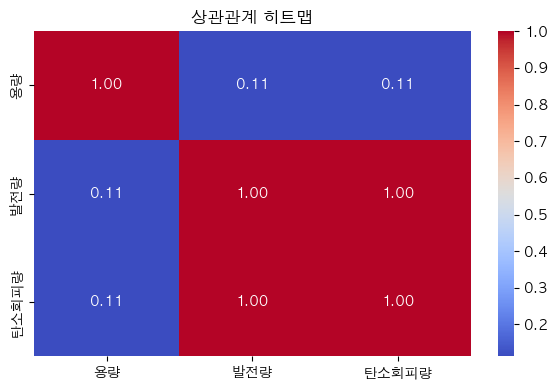

In [144]:
#hearmat(plot)
plt.figure(figsize=(6, 4))
sns.heatmap(merged_data[['용량', '발전량', '탄소회피량']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계 히트맵')
plt.tight_layout()
plt.show()

In [145]:
#calculate Pearson correlation and p-value for each pair
corr_capacity_gen, p_value_capacity_gen = pearsonr(merged_data['용량'], merged_data['발전량'])
corr_capacity_avoid, p_value_capacity_avoid = pearsonr(merged_data['용량'], merged_data['탄소회피량'])
corr_gen_avoid, p_value_gen_avoid = pearsonr(merged_data['발전량'], merged_data['탄소회피량'])

print(f"용량과 발전량 상관계수: {corr_capacity_gen:.3f}, p-value: {p_value_capacity_gen:.4f}")
print(f"용량과 탄소회피량 상관계수: {corr_capacity_avoid:.3f}, p-value: {p_value_capacity_avoid:.4f}")
print(f"발전량과 탄소회피량 상관계수: {corr_gen_avoid:.3f}, p-value: {p_value_gen_avoid:.4f}")


용량과 발전량 상관계수: 0.113, p-value: 0.0090
용량과 탄소회피량 상관계수: 0.113, p-value: 0.0090
발전량과 탄소회피량 상관계수: 1.000, p-value: 0.0000


### 해석
- 용량과 발전량 상관계수: 0.113, p-value: 0.0090
상관계수(0.113)는 용량과 발전량간에 약한 긍정적인 상관관계가 있음, p-value(0.0090)는 0.05보다 작기 때문에, 이 상관관계는 통계적으로 유의미하다고 할 수 있음.

- 용량과 탄소회피량 상관계수: 0.113, p-value: 0.0090
용량과 탄소회피량 사이에도 약한 긍정적인 상관관계가 있으며, 상관계수: 0.113
p-value(0.0090)가 0.05보다 작으므로 이 상관관계도 통계적으로 유의미하다고 볼 수음

- 발전량과 탄소회피량 상관계수: 1.000, p-value: 0.0000
상관계수(1.000)는 발전량과 탄소회피량 사이에 완벽한 긍정적인  있음
발전량이 증가할 때 탄소회피량도 정확히 동일하게 증가한다는 의미
p-value(0.0000)는 매우 작은 값으로, 이 상관관계는 매우 통계적으로 유의미하다고 할 수 있음

결론:
용량과 발전량, 용량과 탄소회피량은 약한 긍정적인 상관관계를 가지며, 통계적으로 유의미함.
발전량과 탄소회피량은 완벽하게 상관되어 있으며, 이는 발전량 증가가 탄소회피량의 증가와 정확히 일치함을 의미

In [146]:
#시계열 분석
merged_data_trend = merged_data.groupby('연도')[['용량', '발전량', '탄소회피량']].sum().reset_index()
merged_data_trend


,연도,용량,발전량,탄소회피량
0,2021,2354730.55,8.895505e+09,4.136410e+09
1,2022,1822792.56,9.334962e+09,4.340757e+09
2,2023,2003131.21,9.325919e+09,4.336552e+09


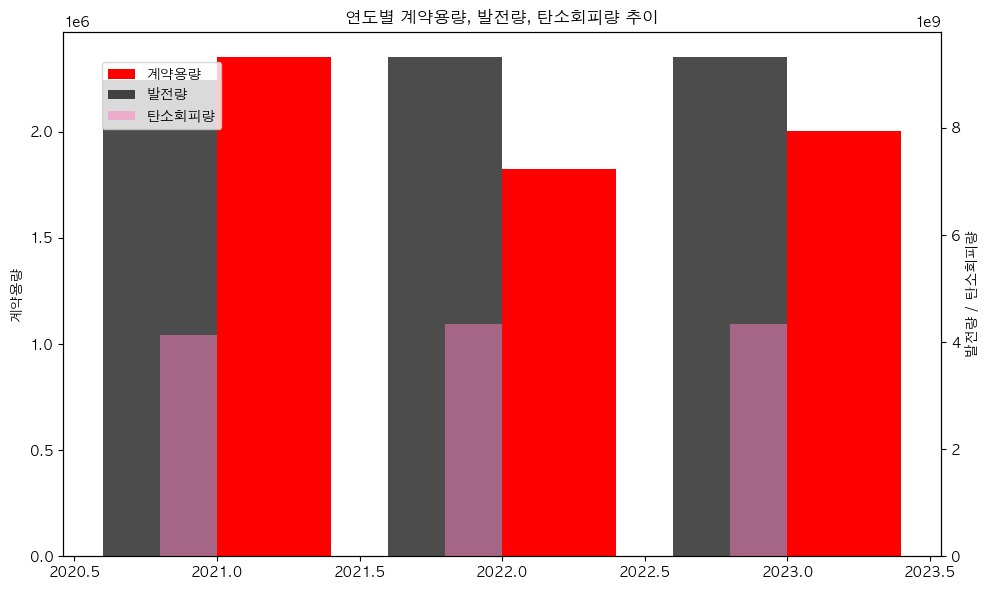

In [147]:
#1번와 2번 결과가 같아서 쓰고 싶은 plot 써주세요. 
#1
fig, ax1 = plt.subplots(figsize=(10, 6))

# 왼쪽 Y축 - 계약용량
ax1.bar(merged_data_trend['연도'], merged_data_trend['용량'], color='red', label='계약용량', width=0.4, align='edge')
ax1.set_ylabel('계약용량', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 오른쪽 Y축 - 발전량과 탄소회피량
ax2 = ax1.twinx()
ax2.bar(merged_data_trend['연도'], merged_data_trend['발전량'], color='black', label='발전량', width=-0.4, align='edge', alpha=0.7)
ax2.bar(merged_data_trend['연도'], merged_data_trend['탄소회피량'], color='#FF81C0', label='탄소회피량', width=-0.2, align='edge', alpha=0.5)
ax2.set_ylabel('발전량 / 탄소회피량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('연도별 계약용량, 발전량, 탄소회피량 추이')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


In [149]:
X = merged_data_trend['연도']
#Add constant for intercept
X = sm.add_constant(X)  
y_energy = merged_data_trend['용량']
y_loc = merged_data_trend['발전량']
y_carbon = merged_data_trend['탄소회피량']

#linear regression
model_energy = sm.OLS(y_capacity, X).fit()
model_loc = sm.OLS(y_generation, X).fit()
model_carbon = sm.OLS(y_carbon_avoidance, X).fit()

print("P-value for 용량:", model_energy.pvalues[1])
print("P-value for 발전량:", model_loc.pvalues[1])
print("P-value for 탄소회피량:", model_carbon.pvalues[1])


P-value for 용량: 0.549666193540659
P-value for 발전량: 0.3447947880716912
P-value for 탄소회피량: 0.3447947880716923


### 해석
연도별 계약용량, 발전량, 탄소회피량의 변화 추이 해석

- 용량 (계약량): p-value: 0.5497
유의미하지 않음 -> p-value가 0.05보다 크므로, 용량에 대한 연도별 차이는 통계적으로 유의미하지 않다.
발전량

- 발전량 -> p-value: 0.3448
유의미하지 않음 -> 발전량에 대한 연도별 차이 역시 p-value가 0.05보다 크므로, 통계적으로 유의미한 차이가 존재하지 않다.

- 탄소회피량 -> p-value: 0.3448
유의미하지 않음 -> 탄소회피량에 대해서도 p-value가 0.05보다 크므로, 연도별 차이가 통계적으로 유의미하지 않다.

유의미한 차이 없음: 용량, 발전량, 탄소회피량의 연도별 차이는 통계적으로 유의미하지 않음

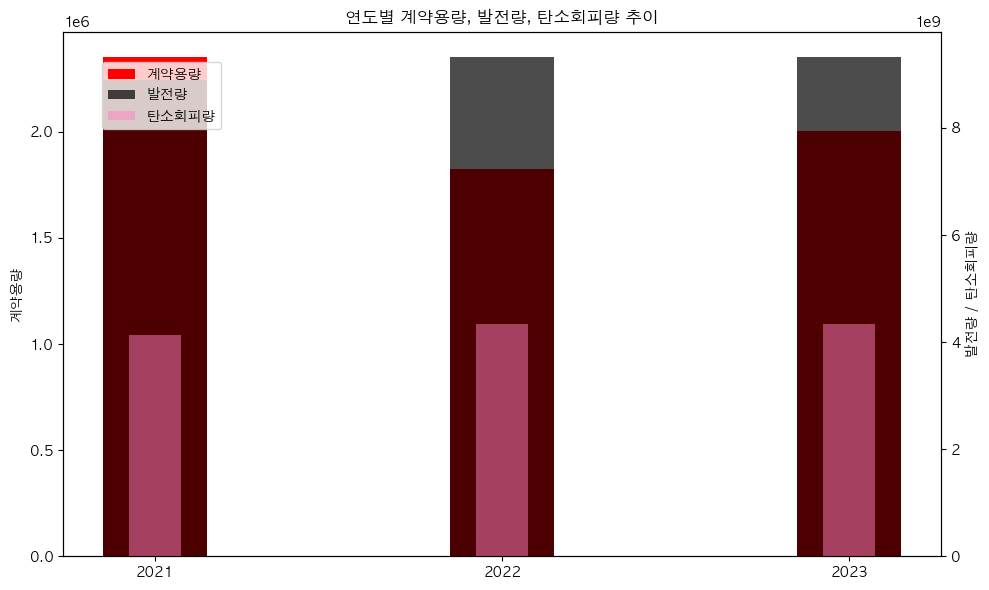

In [154]:
#2
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis: 계약용량
ax1.bar(merged_data_trend['연도'], merged_data_trend['용량'], color='red', label='계약용량', width=0.3)
ax1.set_ylabel('계약용량', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Right Y-axis: 발전량 + 탄소회피량
ax2 = ax1.twinx()
ax2.bar(merged_data_trend['연도'], merged_data_trend['발전량'], color='black', label='발전량', width=0.3, alpha=0.7)
ax2.bar(merged_data_trend['연도'], merged_data_trend['탄소회피량'], color='#FF81C0', label='탄소회피량', width=0.15, alpha=0.5)
ax2.set_ylabel('발전량 / 탄소회피량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

#clean year labels
ax1.set_xticks(merged_data_trend['연도'])

plt.title('연도별 계약용량, 발전량, 탄소회피량 추이')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()
